In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/df_250519.csv')
df

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,date
0,0,1,59,admin.,married,secondary,False,2343,True,False,unknown,5,May,1042,1,-1,0,unknown,True,2024-05-05
1,1,2,59,admin.,married,secondary,False,2343,True,False,unknown,5,May,1042,1,-1,0,unknown,True,2024-05-05
2,2,3,56,admin.,married,secondary,False,45,False,False,unknown,5,May,1467,1,-1,0,unknown,True,2024-05-05
3,3,4,41,technician,married,secondary,False,1270,True,False,unknown,5,May,1389,1,-1,0,unknown,True,2024-05-05
4,4,5,55,services,married,secondary,False,2476,True,False,unknown,5,May,579,1,-1,0,unknown,True,2024-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,16158,21379,82,housemaid,divorced,primary,False,1381,False,False,cellular,28,Jan,86,3,93,1,failure,False,2024-01-28
16159,16159,21380,35,blue-collar,married,unknown,False,1084,True,False,cellular,10,Jul,1019,1,-1,0,unknown,False,2024-07-10
16160,16160,21381,33,technician,married,secondary,True,72,True,False,unknown,6,May,623,1,-1,0,unknown,False,2024-05-06
16161,16161,21382,23,student,single,secondary,False,480,False,False,cellular,9,Feb,742,2,182,1,failure,True,2024-02-09


## K-modes -> variables categóricas

In [31]:
X = df[['job', 'marital', 'education']]

In [32]:
# Perform k-modes clustering
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X)
# Print the resulting clusters
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2469, cost: 15234.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2306, cost: 15031.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2000, cost: 16150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 17677.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 16354.0
Best run was number 2
[2 2 2 ... 2 0 0]


## K-prototypes -> variables numéricas y categóricas

#### Prueba 1: 3 clusters

In [ ]:
X_proto = df[['balance', 'job', 'marital', 'education']].copy()

# Convertir columnas categóricas a string
X_proto[['job', 'marital', 'education']] = X_proto[['job', 'marital', 'education']].astype(str)

# Crear instancia
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)

# Ajustar modelo y predecir
clusters = kproto.fit_predict(X_proto, categorical=[1, 2, 3])

# Mostrar resultados
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1481, ncost: 56011626039.83541
Run: 1, iteration: 2/100, moves: 982, ncost: 49163620418.81072
Run: 1, iteration: 3/100, moves: 720, ncost: 45727104665.15706
Run: 1, iteration: 4/100, moves: 419, ncost: 44504947308.6614
Run: 1, iteration: 5/100, moves: 338, ncost: 43442687248.54443
Run: 1, iteration: 6/100, moves: 309, ncost: 42172029286.35904
Run: 1, iteration: 7/100, moves: 279, ncost: 40568540110.72338
Run: 1, iteration: 8/100, moves: 200, ncost: 40096989854.554344
Run: 1, iteration: 9/100, moves: 116, ncost: 39956854898.95939
Run: 1, iteration: 10/100, moves: 84, ncost: 39926876227.29721
Run: 1, iteration: 11/100, moves: 48, ncost: 39914832665.61822
Run: 1, iteration: 12/100, moves: 24, ncost: 39912334166.719376
Run: 1, iteration: 13/100, moves: 13, ncost: 39911753859.66345
Run: 1, iteration: 14/1

In [ ]:
df['cluster'] = clusters
df['cluster'].value_counts().sort_index()

cluster
0      114
1     1709
2    14340
Name: count, dtype: int64

#### Prueba 2: 5 clusters

In [44]:
X_proto = df[['balance', 'job', 'marital', 'education']].copy()

# Convertir columnas categóricas a string
X_proto[['job', 'marital', 'education']] = X_proto[['job', 'marital', 'education']].astype(str)

# Crear instancia
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=1)

# Ajustar modelo y predecir
clusters = kproto.fit_predict(X_proto, categorical=[1, 2, 3])

# Mostrar resultados
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2310, ncost: 40638087560.76637
Run: 1, iteration: 2/100, moves: 1430, ncost: 32194502221.860733
Run: 1, iteration: 3/100, moves: 851, ncost: 24723954223.265526
Run: 1, iteration: 4/100, moves: 527, ncost: 22290427613.98097
Run: 1, iteration: 5/100, moves: 544, ncost: 21563152763.807533
Run: 1, iteration: 6/100, moves: 556, ncost: 21094391935.395798
Run: 1, iteration: 7/100, moves: 396, ncost: 20856289999.272354
Run: 1, iteration: 8/100, moves: 351, ncost: 20666566830.209293
Run: 1, iteration: 9/100, moves: 356, ncost: 20384361956.544678
Run: 1, iteration: 10/100, moves: 300, ncost: 20249508926.20372
Run: 1, iteration: 11/100, moves: 276, ncost: 20148823486.045605
Run: 1, iteration: 12/100, moves: 246, ncost: 20070200015.65801
Run: 1, iteration: 13/100, moves: 171, ncost: 20000837057.81062
Run: 1, ite

In [45]:
df['cluster'] = clusters
df['cluster'].value_counts().sort_index()

cluster
0     3027
1      203
2    12087
3       34
4      812
Name: count, dtype: int64

### Elbow method para encontrar k óptimo
Calculo el costo para diferentes valores de l entre 2 - 9 (inclusive)

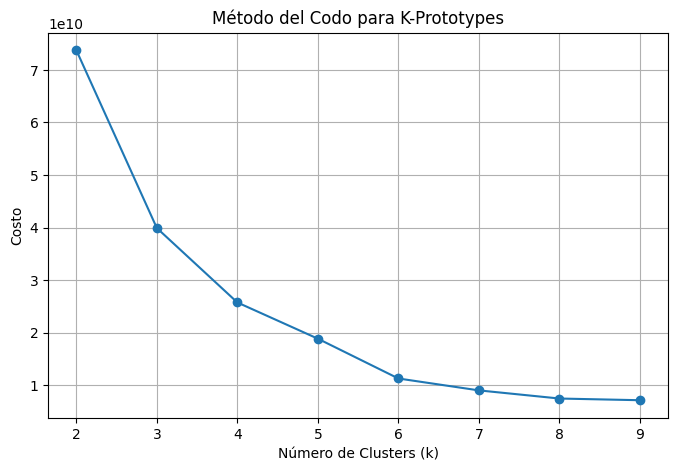

In [49]:
costs = []
ks = list(range(2, 10))

for k in ks:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X_proto, categorical=[1, 2, 3])
    costs.append(kproto.cost_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, costs, marker='o')
plt.title('Método del Codo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Costo')
plt.grid(True)
plt.show()

### 8 clusters

In [3]:
X_proto = df[['balance', 'job', 'marital', 'education']].copy()

# Convertir columnas categóricas a string
X_proto[['job', 'marital', 'education']] = X_proto[['job', 'marital', 'education']].astype(str)

# Crear instancia
kproto = KPrototypes(n_clusters=8, init='Cao', verbose=0)

# Ajustar modelo y predecir
clusters = kproto.fit_predict(X_proto, categorical=[1, 2, 3])

# Mostrar resultados
print(clusters)

[1 1 0 ... 0 0 0]


In [4]:
df['cluster'] = clusters
df['cluster'].value_counts().sort_index()

cluster
0    9065
1    1875
2     406
3     871
4    3657
5       9
6      79
7     201
Name: count, dtype: int64

### 9 clusters

In [5]:
X_proto = df[['balance', 'job', 'marital', 'education']].copy()

# Convertir columnas categóricas a string
X_proto[['job', 'marital', 'education']] = X_proto[['job', 'marital', 'education']].astype(str)

# Crear instancia
kproto = KPrototypes(n_clusters=9, init='Cao', verbose=0)

# Ajustar modelo y predecir
clusters = kproto.fit_predict(X_proto, categorical=[1, 2, 3])

# Mostrar resultados
print(clusters)

[6 6 2 ... 2 2 2]


In [6]:
df['cluster_9'] = clusters
df['cluster_9'].value_counts().sort_index()

cluster_9
0      79
1     403
2    8645
3     719
4     201
5    3433
6    1819
7       9
8     855
Name: count, dtype: int64

In [ ]:
df.groupby('cluster_9')['job'].unique()         # Lista de trabajos por cada cluster

cluster_9
0    [technician, entrepreneur, management, student...
1    [blue-collar, management, retired, technician,...
2    [admin., management, retired, technician, blue...
3    [blue-collar, entrepreneur, admin., retired, s...
4    [management, technician, unknown, entrepreneur...
5    [technician, management, admin., blue-collar, ...
6    [admin., services, management, technician, hou...
7    [self-employed, retired, technician, blue-coll...
8    [services, blue-collar, technician, management...
Name: job, dtype: object

In [ ]:
df.groupby('cluster_9')['job'].nunique()        # Número de trabajos diferentes en cada cluster

cluster_9
0    10
1    12
2    12
3    10
4    12
5    12
6    12
7     6
8    12
Name: job, dtype: int64

In [13]:
df.groupby('cluster_9')['job'].apply(lambda x: sorted(x.unique()))

cluster_9
0    [admin., blue-collar, entrepreneur, housemaid,...
1    [admin., blue-collar, entrepreneur, housemaid,...
2    [admin., blue-collar, entrepreneur, housemaid,...
3    [admin., blue-collar, entrepreneur, housemaid,...
4    [admin., blue-collar, entrepreneur, housemaid,...
5    [admin., blue-collar, entrepreneur, housemaid,...
6    [admin., blue-collar, entrepreneur, housemaid,...
7    [admin., blue-collar, entrepreneur, retired, s...
8    [admin., blue-collar, entrepreneur, housemaid,...
Name: job, dtype: object

# Encoders

In [ ]:
#categorical_features = ["job", "marital"]
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df['marital_encoded'] = label_encoder.fit_transform(df['marital'])

In [ ]:
#categorical_features = ["education"]
ordinal_encoder = OrdinalEncoder()
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

In [ ]:
df

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,...,duration,campaign,pdays,previous,poutcome,deposit,date,job_encoded,marital_encoded,education_encoded
0,0,1,59,admin.,married,secondary,False,2343,True,False,...,1042,1,-1,0,unknown,True,2024-05-05,0,1,1.0
1,1,2,59,admin.,married,secondary,False,2343,True,False,...,1042,1,-1,0,unknown,True,2024-05-05,0,1,1.0
2,2,3,56,admin.,married,secondary,False,45,False,False,...,1467,1,-1,0,unknown,True,2024-05-05,0,1,1.0
3,3,4,41,technician,married,secondary,False,1270,True,False,...,1389,1,-1,0,unknown,True,2024-05-05,9,1,1.0
4,4,5,55,services,married,secondary,False,2476,True,False,...,579,1,-1,0,unknown,True,2024-05-05,7,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,16158,21379,82,housemaid,divorced,primary,False,1381,False,False,...,86,3,93,1,failure,False,2024-01-28,3,0,0.0
16159,16159,21380,35,blue-collar,married,unknown,False,1084,True,False,...,1019,1,-1,0,unknown,False,2024-07-10,1,1,3.0
16160,16160,21381,33,technician,married,secondary,True,72,True,False,...,623,1,-1,0,unknown,False,2024-05-06,9,1,1.0
16161,16161,21382,23,student,single,secondary,False,480,False,False,...,742,2,182,1,failure,True,2024-02-09,8,2,1.0


In [ ]:
df[['job', 'job_encoded']].value_counts().sort_index(level='job_encoded')

job            job_encoded
admin.         0              1930
blue-collar    1              2857
entrepreneur   2               476
housemaid      3               400
management     4              3711
retired        5              1122
self-employed  6               577
services       7              1315
student        8               522
technician     9              2644
unemployed     10              506
unknown        11              103
Name: count, dtype: int64

In [ ]:
df[['marital', 'marital_encoded']].value_counts().sort_index(level='marital_encoded')

marital   marital_encoded
divorced  0                  1880
married   1                  9162
single    2                  5121
Name: count, dtype: int64

In [ ]:
df[['education', 'education_encoded']].value_counts().sort_index(level='education_encoded')

education  education_encoded
primary    0.0                  2208
secondary  1.0                  7915
tertiary   2.0                  5338
unknown    3.0                   702
Name: count, dtype: int64